In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd

data = pd.read_csv("/Users/mukundverma/Downloads/synth.tr",sep = ',',header = None)
#df = df[:,:1]
df = data.as_matrix(columns=data.columns[0:2])




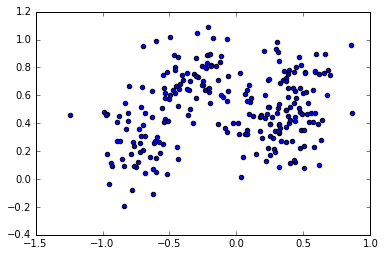

In [2]:


%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df[:, 0], df[:, 1])
plt.show()

In [3]:
def random_centroids(data, k):
    centroids_random = df.copy()
    np.random.shuffle(centroids_random)
    return centroids_random[0:k]

In [272]:
random_centroids(df,3)

array([[ 0.40142623,  0.42516398],
       [ 0.47555171,  0.65056336],
       [-0.591361  ,  0.30230321]])

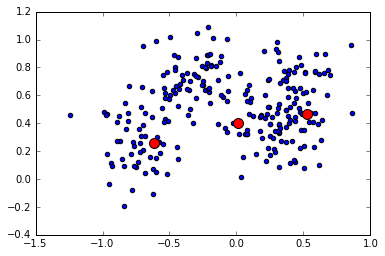

In [4]:
plt.scatter(df[:, 0], df[:, 1])
centers = random_centroids(df, 3)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=100)

In [274]:
def closest_centroid(data, centers):
    dists = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(dists, axis=0)


In [5]:
def distEclud(vecA, vecB):
    return sqrt(sum((vecA - vecB)**2))

In [276]:
clusterAssment = mat(zeros((df.shape[0],2)))
print clusterAssment

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]

In [277]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=random_centroids):
    m = dataSet.shape[0]                            #number of items in the data
    clusterAssment = np.zeros((dataSet.shape[0],2))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True 
            clusterAssment[i,:] = minIndex,minDist**2 
        #print centroids, clusterAssment[i,:]
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0]==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment, clusterAssment.shape

In [281]:
import numpy as np
from numpy import *
import math 
c, a, s = kMeans(df, 4)

In [282]:
print c

[[-0.32194233  0.72447513]
 [ 0.48567412  0.68061508]
 [-0.74050197  0.25513837]
 [ 0.26043027  0.35611627]]


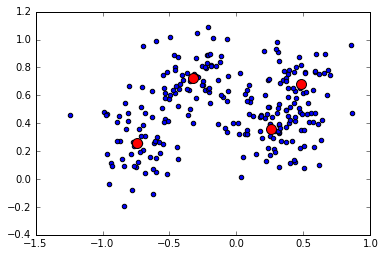

In [283]:
plt.scatter(df[:, 0], df[:, 1])
plt.scatter(c[:, 0], c[:, 1], c='r', s=100)

In [23]:
from numpy import *
import math 
def memberFuzzy(i,j,centers,distFunc = distEclud): # a(j,i) = exp(- || xj - mi ||2 ), one might use u(j,i) = a(j,i) / sum_j a(j,i)
    d = 0
    #nr = math.exp(-(distFunc(i, centers[j,:])**2))
    nr = 1/distFunc(i, centers[j,:])
    for k in range(centers.shape[0]):
        #d = d + math.exp(-(distFunc(i,centers[k,:])**2))
        d += 1/distFunc(i, centers[k,:])
    return nr/d

In [24]:
def cmeans(dataSet, k, distMeas=memberFuzzy, createCent=random_centroids):
    m = dataSet.shape[0]                            #number of items in the data
    membershipMat = np.zeros((dataSet.shape[0],k))
    centroids = createCent(dataSet, k)
    plt.scatter(df[:, 0], df[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    clusterAssment = np.zeros((dataSet.shape[0],2)) 
    it = 500
    while it > 0:
        for i in range(m):
            for j in range(k):
                membershipMat[i,j] = distMeas(dataSet[i,:],j, centroids)
                membershipMat[np.isnan(membershipMat)] = 0.0
                minDist = np.max(membershipMat[i,:]); minIndex = j
            clusterAssment[i,:] = minIndex,minDist
            
        #print membershipMat
        v1 = 0
        v2 = 0
        for cent in range(k):
            v1 = 0
            v2 = 0
            for i in range(m):
                v1 += (membershipMat[i,cent]**2) * dataSet[i,:]
                v2 += membershipMat[i,cent]**2
            #print v1, v2    
            centroids[cent,:] = v1/v2    
        it -=1
    return centroids   #, clusterAssment, clusterAssment.shape

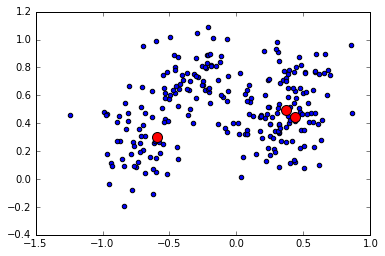

In [25]:
c1 = cmeans(df,3)

[[-0.52013727  0.41953185]
 [-0.13544963  0.59487825]
 [ 0.30340811  0.49284175]]


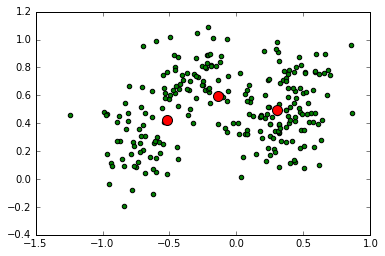

In [26]:
print c1
plt.scatter(df[:, 0], df[:, 1], c='g')
plt.scatter(c1[:, 0], c1[:, 1], c='r', s = 100)

In [ ]:
def kernel(i,center):
    k = (i.T.dot(center))**3

In [ ]:
def kernelKMeans(dataSet, k, distMeas=kernel, createCent=random_centroids):
    m = dataSet.shape[0]                            #number of items in the data
    clusterAssment = np.zeros((dataSet.shape[0],2))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True 
            clusterAssment[i,:] = minIndex,minDist**2 
        #print centroids, clusterAssment[i,:]
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0]==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment, clusterAssment.shape